In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn as skn
import pandas as pd
import matplotlib.pyplot as plt


### Loading Data

loaded 500 torque values and 500 time values
                                              torque  \
0  [0, 0, 0.002, 0.087, 0.217, 0.146, 0.156, 0.16...   
1  [0.083, 0.126, 0.112, 0.083, 0.089, 0.092, 0.1...   
2  [0.002, 0.01, 0.035, 0.092, 0.112, 0.099, 0.08...   
3  [0, 0.008, 0.041, 0.112, 0.17, 0.174, 0.118, 0...   
4  [0, 0.008, 0.055, 0.096, 0.116, 0.096, 0.083, ...   

                                                time  OK  
0  [0, 0.0024, 0.0036, 0.0048, 0.006, 0.0072, 0.0...   1  
1  [0, 0.0012, 0.0024, 0.0036, 0.0048, 0.006, 0.0...   1  
2  [0, 0.0012, 0.0024, 0.0036, 0.0048, 0.006, 0.0...   1  
3  [0, 0.0012, 0.0024, 0.0036, 0.0048, 0.006, 0.0...   1  
4  [0, 0.0024, 0.0036, 0.0048, 0.006, 0.0072, 0.0...   1  
                                                torque  \
495  [-0.003, -0.001, 0.002, 0.025, 0.085, 0.152, 0...   
496  [0.008, 0.008, 0.069, 0.139, 0.142, 0.071, 0.1...   
497  [0, -0.001, 0.075, 0.124, 0.122, 0.057, 0.11, ...   
498  [0.008, 0.014, 0.075, 0.071

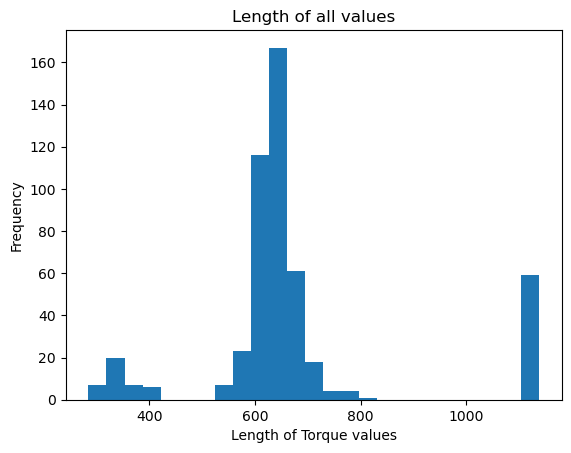

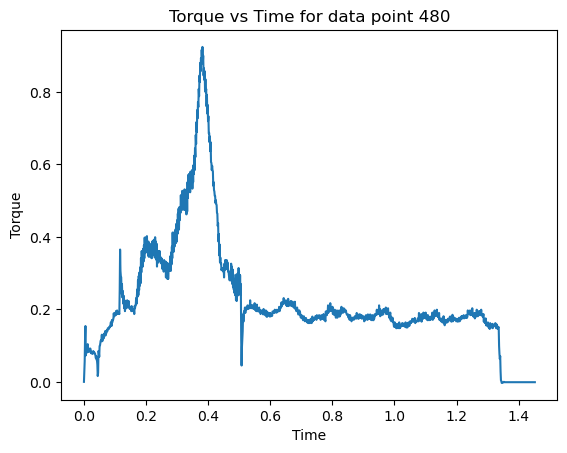

In [30]:
from jsons_to_nested_list import screw_data_loader

path = "./data/"
torque, time = screw_data_loader(path)

print(f"loaded {len(torque)} torque values and {len(time)} time values")

# create pandas dataframe for torque and time
torque_time = pd.DataFrame({'torque': torque, 'time': time})

# label the last 100 points as not ok
torque_time['OK'] = [1] * (len(torque_time) - 100) + [0] * 100

# show dataframe head
# Okay Data
print(torque_time.head())
# Anaomly Data
print(torque_time.tail())

# Len of all values
len_of_all_values = [len(val) for val in torque]
plt.hist(len_of_all_values, bins=25)
plt.title("Length of all values")
plt.xlabel("Length of Torque values")
plt.ylabel("Frequency")

plt.show()

# Plot torque vs time for Nth data point
n = 480
plt.plot(time[n], torque[n])
plt.title(f"Torque vs Time for data point {n}")
plt.xlabel("Time")
plt.ylabel("Torque")
plt.show()


count                                                   500
unique                                                  500
top       [0, 0, 0.002, 0.087, 0.217, 0.146, 0.156, 0.16...
freq                                                      1
Name: torque, dtype: object


Text(0, 0.5, 'Frequency')

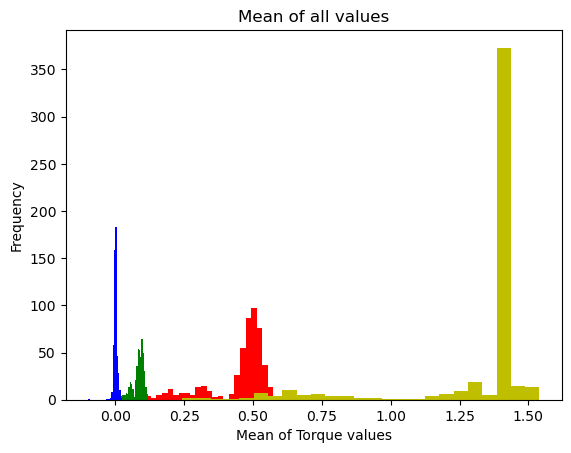

In [24]:
torque_summary = torque_time['torque'].describe()
print(torque_summary)

mean_of_values = [np.mean(val) for val in torque]
var_of_values = [np.var(val) for val in torque]
min_of_values = [np.min(val) for val in torque]
max_of_values = [np.max(val) for val in torque]
plt.hist(mean_of_values, bins=25, color='r')
plt.hist(var_of_values, bins=25, color='g')
plt.hist(min_of_values, bins=25, color='b')
plt.hist(max_of_values, bins=25, color='y')
plt.title("Mean of all values")
plt.xlabel("Mean of Torque values")
plt.ylabel("Frequency")



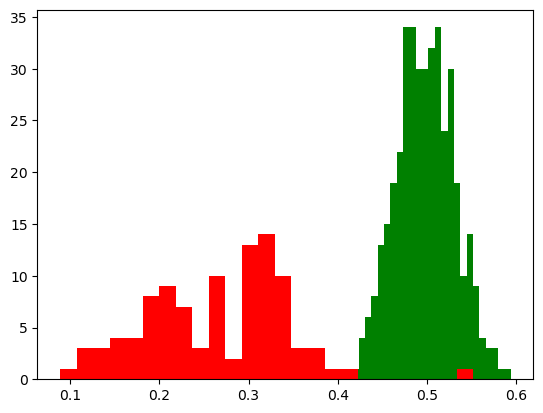

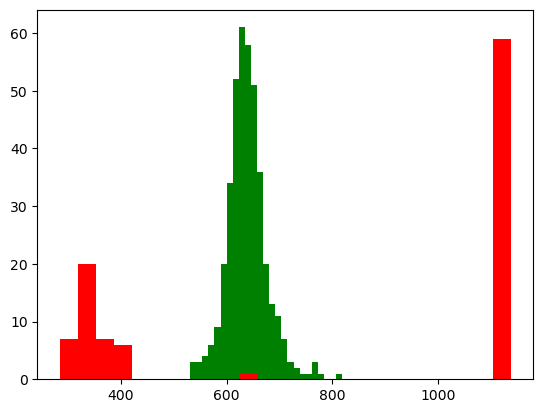

In [48]:
# Plot ok and not ok data as histograms
okay_data = torque_time[torque_time['OK'] == 1]
not_ok_data = torque_time[torque_time['OK'] == 0]

# Separate the data with mean
plt.hist([np.mean(t) for t in okay_data.torque], bins=25, color='g')
plt.hist([np.mean(t) for t in not_ok_data.torque], bins=25, color='r')
plt.show()

# Separate the data with variance
plt.hist([len(t) for t in okay_data.torque], bins=25, color='g')
plt.hist([len(t) for t in not_ok_data.torque], bins=25, color='r')
plt.show()

In [ ]:
# Option 1 - Do binary classification using length of torque values - Cut lenth of toruqe values to 0-800

# Option 2 - Do binary classification using the mean of torque values